**PROBLEM : 4**

Importing the requried packages

In [16]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Loading the data with the help of dataframes and load text method from numpy
and printin the shape of the x data and y data and also printing the few item from the x data and y data which is shown bleow.

In [17]:
xlabels = pd.DataFrame(np.loadtxt("x.dat")) #load the X data
ylabels = pd.DataFrame(np.loadtxt("y.dat"))  #load the Y data
print(xlabels.head()) #priniting the few elements from the X data
print(' ')
print('The shape of X data',xlabels.shape) #priniting the shape of X data
print(' ')
print(ylabels.head()) #priniting the few elements from the Y data
print(' ')
print('The shape of Y data',ylabels.shape) #priniting the shape of X data
DATA = pd.concat([xlabels, ylabels],axis=1)
DATA.columns=['xlabelcol1','xlabelcol2','results'] #naming the columns 

          0         1
0 -0.347926  0.862573
1 -0.145161  0.628655
2 -0.034562  0.289474
3 -0.149770  0.073099
4 -0.352535 -0.160819
 
The shape of X data (69, 2)
 
     0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0
 
The shape of Y data (69, 1)


From the above we can see we had combine the both x and y data sets and given the names for the columns, with the help of the columns we plot the figure with O's and 1's of Y data which is based on the X data.

Text(0.5, 1.0, 'The data with zeros labels and ones lables')

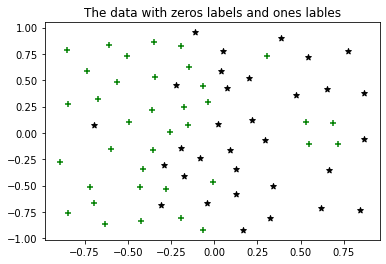

In [18]:
ones = DATA[DATA.results == 1] #dividing the data with has label l in the Y's data
zeros = DATA[DATA.results == 0] #dividing the data with has label 0 in the X's data
plt.scatter(ones.xlabelcol1, ones.xlabelcol2, c = 'k', marker = '*') #plotting the ones in the figure
plt.scatter(zeros.xlabelcol1, zeros.xlabelcol2, c = 'g', marker = '+') #plotting the zero's in the figure
plt.title('The data with zeros labels and ones lables')

Creating a function to get the hypothesis 

In [19]:
def hypomat(o, l): #creating the def function for hypothesis
    return si(np.dot(l, o)) # Hypothesis hypomat theta(xi)

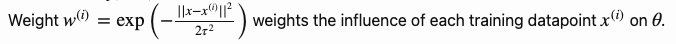

In [20]:
def GW(D, pn, bandwidth): #creating the def function 
    nr = np.repeat(pn, D.shape[0], axis = 0)  # Squared Exponential kernal   
    ns = np.linalg.norm(D - nr, axis = 1) ** 2 #a 2d, axis=1 == col, axis=0 == rows
    feat = np.exp(-ns / (2 * bandwidth ** 2))
    return feat.reshape(len(feat), 1)
    #return np.exp(-1./(2*bandwidth**2) * np.linalg.norm((D-pn), ord=2))

Screenshot 2022-04-15 at 10.22.33 PM.png

Below function is used to create the sigmoid function

In [21]:
def si(a): #creating the def function 
    return 1 / (1 + np.e**(-a)) 

Below algorithm is for the training the model 

In [22]:
def Locallyweightedlogisticregressionalgo(xl, yl, x, bandwidth): #creating a def function
    l = np.concatenate([np.asarray([[1]]), x], axis = 1) #add the bias columns 
    xco = pd.concat([pd.Series(np.ones(len(xl.index))), xl], axis = 1)    
    ol = xco.shape[1] # no of features
    o = np.zeros([ol, 1]) #weights of theta assign to zero
    for i in range(10): #calculating the values for the distance matrix 
        feat = GW(xco, l, bandwidth) #calling the function for the weights 
        e = feat * (yl - hypomat(o, xco)) 
        derivation = np.dot(xco.transpose(), e) - 0.0001 * o #0.0001 is thershold for the Regularization parameter  # Regularization matrix for the Hessian
        da = -feat * hypomat(o, l) * (1 - hypomat(o, l))
        digamat = np.diag(da[:, 0]) #creating the diagonal matrix
        hessmat = np.dot(np.dot(xco.transpose(), digamat), xco) - 0.0001 * np.eye(xco.shape[1]) #for gradeint hessian
        on = o - np.dot(np.linalg.inv(hessmat), derivation) 
        o = on #newton's update
    return o

After the training the model, we have plot the actual values and predicted values from the model, below code is used to plot the values.

In [23]:
def figureplotting(xl, yl, bandwidth, r): #creating def function
    xmat = np.zeros([1, 2]) #setting up the plot for the acutal values
    predictionmodel = np.empty(shape = (r, r)) #setting up the plot for the predicited model
    for i in range(1, r):
        for j in range(1, r):
            xmat[0][1] = (2*(j-1)/(r-1)) - 1 #making predictions 
            xmat[0][0] = (2*(i-1)/(r-1)) - 1
            fl = Locallyweightedlogisticregressionalgo(xl, yl, xmat, bandwidth) #calling the model 
            l = np.concatenate([np.asarray([[1]]), xmat], axis = 1)
            predictionmodel[i][j] = hypomat(fl, l)
            warnings.filterwarnings('ignore')
            if predictionmodel[i][j] > 5/10: #scattering the points on the plot according the condition
                plt.scatter(xmat[0][0], xmat[0][1], c = 'k', marker = '*',alpha=0.85)
            else:
                plt.scatter(xmat[0][0], xmat[0][1], c = 'g', marker = 'o',alpha=0.40)
    plt.ylim(-1,1)
    plt.xlim(-1,1)
    plt.title("Bandwidth = " + str(bandwidth)) 
    plt.show()

Finally, we are calling the plotting function with x data labels and y data labels with bandwidth of 0.01 and resolution with 57

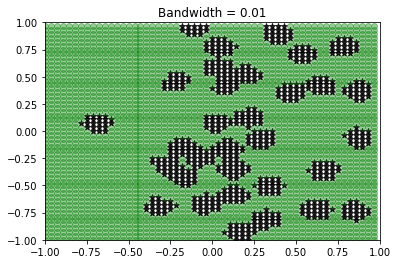

In [24]:
figureplotting(xlabels, ylabels, 0.01, 57)

we are calling the plotting function with x data labels and y data labels with bandwidth of 0.05 and resolution with 57

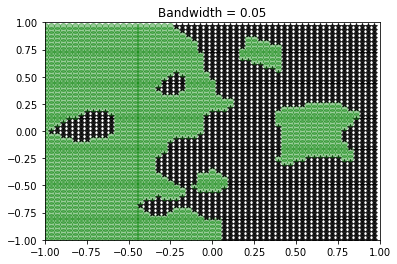

In [25]:
figureplotting(xlabels, ylabels, 0.05, 57)

we are calling the plotting function with x data labels and y data labels with bandwidth of 0.1 and resolution with 57

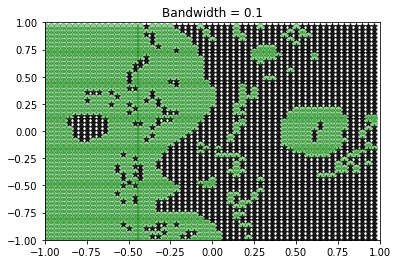

In [26]:
figureplotting(xlabels, ylabels, 0.1, 57)

we are calling the plotting function with x data labels and y data labels with bandwidth of 0.5 and resolution with 57

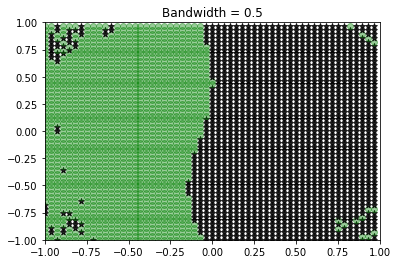

In [27]:
figureplotting(xlabels, ylabels, 0.5, 57)

we are calling the plotting function with x data labels and y data labels with bandwidth of 1.0 and resolution with 57

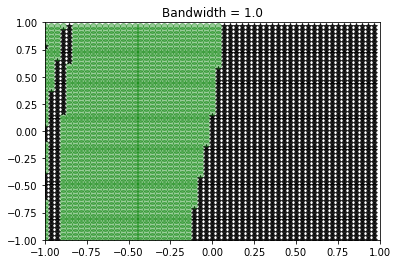

In [28]:
figureplotting(xlabels, ylabels, 1.0, 57)

we are calling the plotting function with x data labels and y data labels with bandwidth of 5.0 and resolution with 57

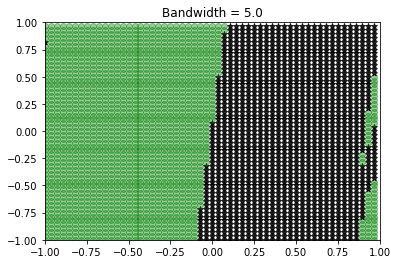

In [29]:
figureplotting(xlabels, ylabels, 5.0, 57)

It changes the weights for each distance to make the boundaries more or less diffuse. Furthermore, smaller bandwidth values produce a high variance, low bias decision boundary, whereas greater bandwidth values produce a low variance, high bias decision boundary.

As τ→∞, w(i)→1, by this, we can say that as in unweighted logistic regression, all points will have the same weight and model converges to unweighted logistic regression.